In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statwrap
np.random.seed(3)

%use_fpp

In [34]:
n = 1_000
p = 0.5
binom10 = stats.binom.rvs(n=10,
                          p=p,
                         size = n)
binom20 = stats.binom.rvs(n=20,
                         p=p,
                         size=n)

binom100 = stats.binom.rvs(n=100,
                         p=p,
                         size=n)

binom40 = stats.binom.rvs(n=40,
                         p=p,
                         size=n)

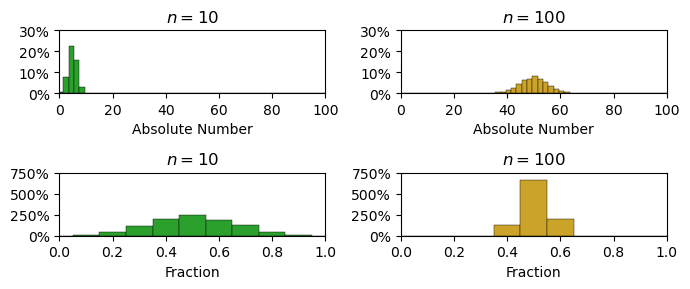

In [129]:
fig, axs = plt.subplots(2,2, sharex = False, sharey = False, figsize = (7,3))

ax = axs[0,0]
class_intervals = np.arange(-0.5, 101.6,2)
class_intervals_pct = np.arange(-0.05, 1.06,.1)
#class_intervals_pct = class_intervals_pct[::4]

kwargs = dict(show=False,
         class_intervals = class_intervals,
             linewidth = .3)
kwargs_pct = dict(show=False,
         class_intervals = class_intervals_pct,
             linewidth = .3)


histogram(binom10,
          ax=axs[0,0], 
          **kwargs, title = '$n=10$',
         color = 'C2')
histogram(binom10/10,
          ax=axs[1,0], 
          **kwargs_pct, title = '$n=10$',
         color = 'C2')


ax = axs[0,1]
#histogram(binom20, ax=ax, **kwargs)
#ax = axs[2]
yellow = .8 * np.array([1, .8, .2])
histogram(binom100, ax=axs[0,1], **kwargs, title = '$n=100$',
         color = yellow)
histogram(binom100/100,
          ax=axs[1,1], 
          **kwargs_pct, title = '$n=100$',
         color = yellow)

# match y limits within rows
axs[0,1].set_ylim(axs[0,0].get_ylim())
axs[0,1].set_yticks(axs[0,0].get_yticks())
axs[0,1].set_yticklabels(axs[0,0].get_yticklabels())

axs[1,0].set_ylim(axs[1,1].get_ylim())
axs[1,0].set_yticks(axs[1,1].get_yticks())
axs[1,0].set_yticklabels(axs[1,1].get_yticklabels())


for ax in axs[0,0], axs[0,1]:
    ax.set_xlim(0,100)
    ax.set_xlabel("Absolute Number")
for ax in axs[1,0], axs[1,1]:
    ax.set_xlim(0,1)
    ax.set_xlabel("Fraction")
plt.tight_layout()
plt.savefig('../book/images/chanceErrorHist.svg', transparent = True)